    Copyright(c) 2022-
    Author: Chaitanya Tejaswi (github.com/CRTejaswi)    License: GPLv3.0+

# MicroMagnetic Simulations: System Simulation

Here, we simulate/visualise/analyse a simple system.

The mesh can be visualised by `system.m.mesh.region.k3d()`.

A __system__ is simulated by considering __energies (energy densitites__), __dynamics__, and an __initial magnetic configuration__.

In [1]:
import micromagneticmodel as mm
import discretisedfield as df

system = mm.System()

# Energies: zeeman, anisotropy, demagnetisation
A = 1e-12
H = (5e6, 0, 0)
system.energy   = (mm.Zeeman(H=H)
                 + mm.Exchange(A=A)
                 + mm.Demag())

# Dynamics: precession/damping
gamma0, alpha = 2.211e5, 0.2
system.dynamics = mm.Precession(gamma0=gamma0) + mm.Damping(alpha=alpha)

# Initial Conditions: 
L = 50e-9
Ms = 8e6
region = df.Region(p1=(0,0,0), p2=(L,L,L))
mesh = df.Mesh(region=region, n=(10,10,10))
system.m        = df.Field(mesh,dim=3,value=(0,1,0), norm=Ms)

Now, we visualise the system's behaviour.

In [2]:
system.energy

Zeeman(H=(5000000.0, 0, 0)) + Exchange(A=1e-12) + Demag()

In [3]:
system.dynamics

Precession(gamma0=221100.0) + Damping(alpha=0.2)

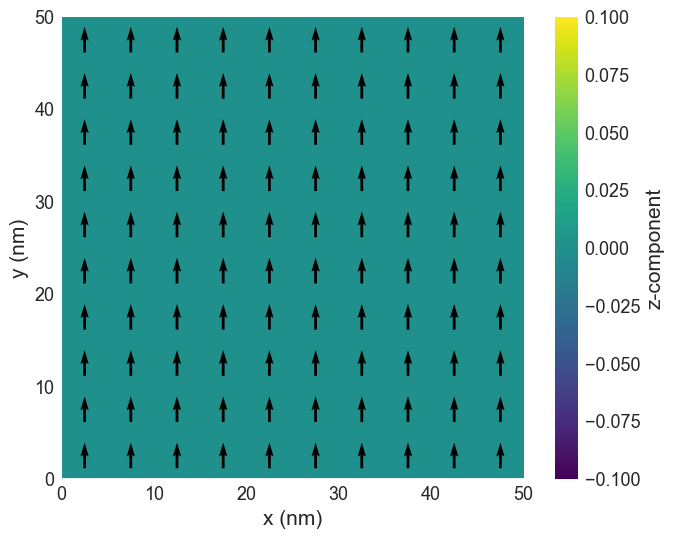

In [4]:
# Initial State
system.m.plane('z').mpl()

In [5]:
system.m.plane('z').k3d.vector(head_size=10)

Output()

Now, we make micro-magnetic calculations.

In [6]:
import oommfc as mc
docker_runner = mc.oommf.DockerOOMMFRunner(image='oommf/oommf')

driver = mc.MinDriver()
driver.drive(system, runner=docker_runner)

Running OOMMF (DockerOOMMFRunner)[2022/11/09 21:51]... (1.9 s)


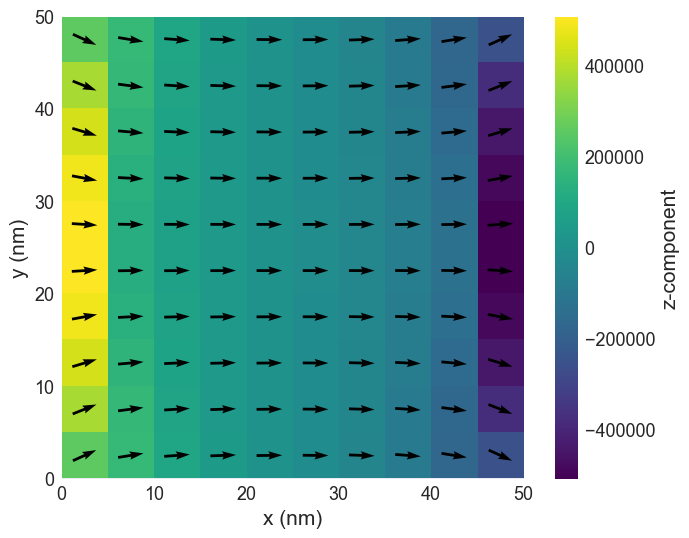

In [7]:
# Final State
system.m.plane('z').mpl()

In [8]:
system.m.plane('z').k3d.vector(head_size=10)

Output()

In [9]:
system.table.data.T

,0
max_mxHxm,9.956389e-02
E,-4.724965e-15
delta_E,-7.888609e-31
bracket_count,4.400000e+01
line_min_count,1.900000e+01
conjugate_cycle_count,1.700000e+01
cycle_count,3.700000e+01
cycle_sub_count,2.000000e+01
energy_calc_count,6.400000e+01
E_zeeman,-6.173354e-15
